1. Primero imprimimos los 10 países más felices y los 10 países con mayor GDP.

In [15]:
import pandas as pd #Importar librería 
datos=pd.read_csv("A1.2 Felicidad y GDP.csv") #Leer datos
felicidadmayor=datos.sort_values(by="Felicidad", ascending=False) #Acomodar datos con nivel de felicidad descendiente
gdpmayor=datos.sort_values(by="GDP", ascending=False) #Acomodar datos con nivel de GDP descendiente
print("10 países con mayor felicidad")
print(felicidadmayor.head(10)) #Imprimir los 10 mayores en felicidad
print("10 países con mayor GDP")
print(gdpmayor.head(10)) #Imprimir los 10 mayores en GDP

10 países con mayor felicidad
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11
10 países con mayor GDP
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


2. Graficamos el logaritmo base natural 10 de GDP vs la felicidad para observar asociaciones.

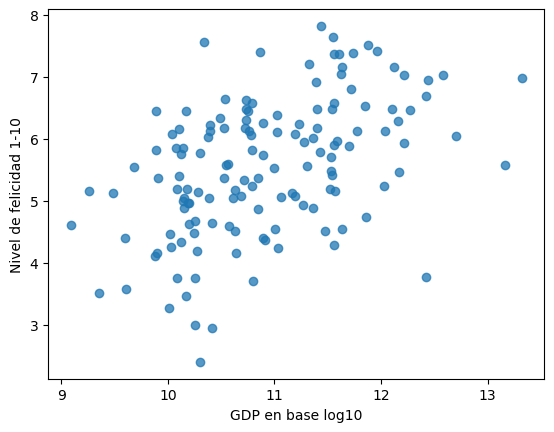

In [16]:
#Importar librerías
import matplotlib.pyplot as plt
import numpy as np
#Función mágica
%matplotlib inline
x=np.log10(datos.GDP) #Pasamos GDP a base log10 para tener datos más "manejables"
y=datos.Felicidad #Felicidad la ponemos como variable independiente
plt.scatter(x , y, alpha=0.75) #Graficamos
plt.ylabel("Nivel de felicidad 1-10") 
plt.xlabel("GDP en base log10")
plt.show()

3. Calculamos los valores óptimos de los coeficientes 

In [5]:
b1=sum((x-np.mean(x))*(y-np.mean(y)))/sum((x-np.mean(x))**2) #Fórmula de B1
print("B1 =", b1)
bo=np.mean(y)-b1*np.mean(x) #Fórmula de B0
print("B0 =", bo)

B1 = 0.6281284658810408
B0 = -1.3023500570747277


4. Graficamos nuevamente los datos dispersos y la ecuación que representa el modelo.

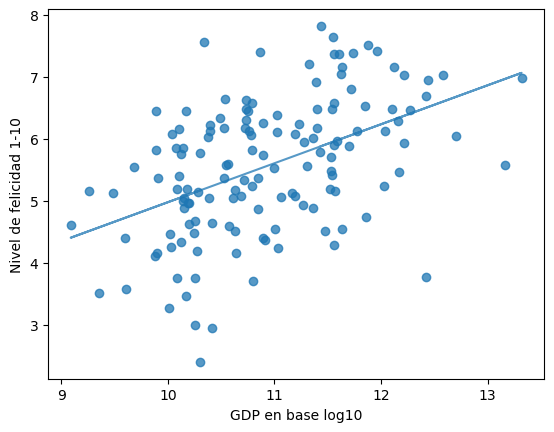

In [6]:
plt.scatter(x , y, alpha=0.75) #Graficamos nuevamente los datos dispersos
plt.ylabel("Nivel de felicidad 1-10")
plt.xlabel("GDP en base log10")
yHat=bo+b1*x #Calculamos las y hat (y esperada) con los coeficientes esperados 
plt.plot(x , yHat, alpha=0.75) #Graficamos la función obtenida
plt.show()

5. Calculo de RSS

In [7]:
RSS=sum((y-yHat)**2) #Fórmula de RSS
print("RSS =", RSS)

RSS = 131.3738317732635


6. Calcula el error estándar e intervalo de confianza de B1. Determina si la asociación entre la felicidad y el GDP es significativa en esta población

In [25]:
import scipy.stats as st #Importar librería
per = st.t.interval( .95, df = n-2)[1]  #Calculamos el percentil al 95% de confianza
SE= np.sqrt(RSS/(n-2)/sum((x-np.mean(x))**2)) #Fórmula de SE
print("SE=", SE)
b1b=b1-per*SE #Límite inferior intervalo
b1t=b1+per*SE #Límite superior intervalo
print("Intervalo {",b1b, " ", b1t ,"}")
t=b1/SE #Formula estadístico t
print("t=", t)
p = st.t.sf(abs(t),n-2)*2 #Calculamos valor pEn b
print("p-value =",p)

SE= 0.09983378435340727
Intervalo { 0.8255176004547504   0.4307393313073311 }
t= 6.291742519320846
p-value = 3.825717831968765e-09


En base a los resultados obtenidos, podemos afirmar con un nivel de confianza del 95% que el coeficiente que relaciona la felicidad con el GDP (en escala logarítmica base 10) se encuentra dentro del intervalo calculado. Esto se respalda en que el p-value es mucho menor que 0.05, lo que indica que la relación es estadísticamente significativa y muy poco probable que sea producto del azar.
En términos prácticos, esto significa que, por cada incremento de una unidad en el GDP (log base 10), la felicidad aumenta entre 0.4307 y 0.8225 puntos, con un 95% de confianza.

7. Calcula el residual standard error y la 𝑅2 del modelo

In [8]:
RSE=np.sqrt(sum((y-yHat)**2)/(n-2)) #Fórmula de RSE
print("RSE=", RSE)
TSS=sum((y-np.mean(y))**2) #Fórmula de TSS
R2=1-RSS/TSS #Fórmula de R2
print("R2=", R2)

RSE= 0.9721807858537376
R2= 0.22166361654970657


Nuestra R2 es de alrededor de 0.22, esto significa que el GDP explica un 22% de la variabilidad de la felicidad. Esto nos dice que aunque encontramos una asociación positiva entre ellos, no podemos decir que el GDP es un predictor total de la felicidad, es decir, habría que analizar otros factores. 

8. Verificar que los resultados de todos los puntos anteriores son los esperados

In [26]:
#Verificación de resultados obtenidos con librería 
import statsmodels.api as sm
modelo=sm.OLS(y, sm.add_constant(x))
resultados=modelo.fit()
print(resultados.summary())
print("RSE: ")
print(resultados.scale**.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        18:49:09   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2